# RA Test Exercises

|| |
|------|------|
|Date:|04.06.2021|
|------|------|
|Topic:|RA Assignment for Adrien d'Avernas|
|------|------|
|Time:|4 h (9am- 1pm)|
|------|------|
|Questions to:|Martin Waibel (martin.waibel@phdstudent.hhs.se)|

# Instructions

Dear Rodrigo, thank you for applying for the RA position! 

The purpose of this exercise session is to evaluate your overall problem-solving and computing skills that we deem necessary for the RA tasks at hand. Please solve the exercises listed below directly in the jupyter notebook. You find most, but not all, of the required input data in the exercise folder under $\texttt{raw_data}$. If you cannot find the required data in the exercise folder you may want to resort to publicly available online sources of your choice. 

During all the exercises we ask you to particularly focus on the following:

1) $\textbf{Accuracy}:$ Above all else, it is very important for us that you apply the necessary accuracy in the tasks at hand. Most questions are phrased in a rather open way, so you are required to apply your own judgement as to what is necessary to assure the accuracy of your computations. The ultimate goal should NOT be to finish all exercises at the cost of diligence. Rather try to optimize your productivity-quality ratio. 

2) $\textbf{Efficiency}:$ Implement your code in an efficient way. This includes trying to avoid unnecessary repetitions of code fragments, as well as the implementation of fast solutions. Where possible, resort to automated processes. Examples could be to find ways to directly source up-to-date data from the web rather than maunally download it, as well as using functions for repetitive tasks rather than rewriting the code.

3) $\textbf{Readability}:$ Organize your code in a way that is readable for others. In particular, comment wherever deemed necessary and assure that the code is organized in a clear way. This is very important for the RA work as you may frequently collaborate with others. Think about specifying all information necessary for others to quickly understand and adjust your code.

Importantly, when something in the exercises is not entirely clear, this is likely deliberate. As long as you clearly specify your assumptions and your general reasoning, we prefer that you find own solutions rather than asking for assistance. In case you do feel, however, that you need some further clarification, contact Martin (martin.waibel@phdstudent.hhs.se). You have $\textbf{4 hours}$ to work on the exercises. Please submit your $\textbf{processed jupyter notebook}$ containing all your results by 1pm  Martin (martin.waibel@phdstudent.hhs.se).

Best of luck!


($\textbf{Note:}$ You can type your answer text by selecting "Markdown" in the dropdown menu in the jupyter command line. In the Markdown mode you can also type LaTeX code by framing your text with the dollar sign (e.g. $\textit{LaTeX example}$ $x^2 = 9$)

## Exercises 

### Exercise 1.1)

In this exercise you are asked to create $\textit{one cleaned}$ panel dataset containing both stock and balance sheet information for the firms in the dataset $\texttt{stock_data.csv}$ and $\texttt{balance_sheet_data.xlsx}$. Make sure that firms in the merged dataset have information on both stock and balance sheet information. Apply all cleaning steps that you deem appropriate. 

$\textit{Hint:}$ Think about how you should fill the missing values in the balance sheet variables generated by the merge

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import xlrd


In [21]:
#reading the files

stock_df = (pd.read_csv('raw_data/stock_data.csv', parse_dates = True, index_col = 0)
            .rename(columns = {'comnam':'COMPANY NAME', 'permno': 'Firm Id'})
            .astype({'Firm Id':'int32'})
           )

balance_df = (pd.ExcelFile('raw_data/balance_sheet_data.xlsx')
              .parse('bs_data', index_col = 0 , skiprows = 2, parse_date = True)
              .rename(columns = {'Firm Identifier (permno)': 'Firm Id'})
             )

companies_stock = stock_df[['Firm Id','COMPANY NAME']].drop_duplicates()
companies_balance = balance_df[['Firm Id','COMPANY NAME']].drop_duplicates()
all_companies = companies_stock.merge(companies_balance ,how = 'outer', on= 'Firm Id') # there is something strange in data, there are two diffenret companies with the same firm id



In [27]:
complete_info = stock_df.merge(balance_df, how  ='inner', on = 'Firm Id').fillna(0) 
complete_info['date'] = pd.to_datetime(complete_info.date)

In [28]:
complete_info.head()

,Firm Id,permco,ncusip,COMPANY NAME_x,date,ticker,ret,retx,numtrd,vol,...,Costs of goods sold (quarterly),Total Inventories (quarterly),Total Assets (annually),Total Liabilities (annually),Total Equity (annually),Common/Ordinary Equity (annually),Deferred Taxes (annually),Total Revenue (annually),Costs of goods sold (annually),Total Inventories (annually)
0,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,185.107,123.104,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
1,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,213.033,119.190,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
2,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,206.281,116.165,1019.339,185.588,833.751,833.751,61.92,1186.487,787.541,116.165
3,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,192.306,125.789,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
4,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-03,JJSF,0.014326,0.014326,1272.0,84331.0,...,185.107,123.104,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000


In [29]:
len(stock_df['Firm Id'].unique())

520

In [30]:
len(complete_info['Firm Id'].unique())

500

In [31]:
len(balance_df['Firm Id'].unique())

520

In [32]:
total_companies = (540-500) + (540-500) + 500
total_companies

580

### Exercise 1.2)

In this exercise we ask you to perform a thorough descriptive analysis of the merged dataset from above. Briefly comment on your steps. Make sure to analyse whether the merging might have led to a systematic exlusion of specific firms. You can resort to all types of illustrations (tables, graphs, etc.) that you deem helpful in understanding the dataset.

$\textit{Hint:}$ Examine which firms are dropped due to no information in either stock or balance sheet information. Use descriptive statistics, as well as graphical illustrations (if needed) to analyse how the deleted firms compare to the firms that remain in the sample.

I excluded the firms that the information is incomplete, that is, there is in one of table but not in the other. This was done by using the "inner" method in the merge function. I used the Firm Id to compare them.

From $580$ companies, $500$ are in both data. Then $80$ companies are discarded. Only $\approx 86\%$
 of the data will be used.


### Exercise 1.3)
In this exercise we ask you to get the following data and merge it to the existing dataset. 

i) $\textit{Daily three-month Treasury Bill rate}$ (secondary market rate),

ii) $\textit{Quarterly US-GDP}$, 

iii) $\textit{Daily VIX data}$.

Hint: As specified above, you might want to research online where and how to get the information. Also think about easy ways to read the data into Python.

In [33]:
#%pip install quandl
import quandl

#getting daily three-month treasury bill rate
treasury_rate = quandl.get("FRED/DTB3").reset_index().rename(columns= {'Date':'date' , 'Value':'Treasury Bill rate'})


#getting us-gdp
gdp = quandl.get("FRED/GDP").reset_index().rename(columns= {'Date':'date' , 'Value':'US-GDP'})

#getting daily vix data
vix_daily = (pd.read_csv('https://cdn.cboe.com/api/global/us_indices/daily_prices/VIX_History.csv',parse_dates = True)
             .rename(columns ={'DATE':'date', 'OPEN':'open-VIX' , 'HIGH':'high-VIX', 'LOW':'low-VIX', 'CLOSE':'close-VIX'})
            )
vix_daily['date'] = pd.to_datetime(vix_daily.date)

In [34]:
additional_data = complete_info.merge(vix_daily, on= 'date', how = 'inner')

In [35]:
additional_data = additional_data.merge(treasury_rate , on = 'date' , how = 'left' )

In [36]:
additional_data = additional_data.merge( gdp , on = 'date', how = 'left' )

In [37]:
additional_data.head(100)

,Firm Id,permco,ncusip,COMPANY NAME_x,date,ticker,ret,retx,numtrd,vol,...,Deferred Taxes (annually),Total Revenue (annually),Costs of goods sold (annually),Total Inventories (annually),open-VIX,high-VIX,low-VIX,close-VIX,Treasury Bill rate,US-GDP
0,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,0.00,0.000,0.000,0.000,27.67,27.72,23.05,23.22,2.37,NaN
1,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,0.00,0.000,0.000,0.000,27.67,27.72,23.05,23.22,2.37,NaN
2,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,61.92,1186.487,787.541,116.165,27.67,27.72,23.05,23.22,2.37,NaN
3,10026,7976.0,46603210,J & J SNACK FOODS CORP,2019-01-02,JJSF,-0.024829,-0.024829,1648.0,112825.0,...,0.00,0.000,0.000,0.000,27.67,27.72,23.05,23.22,2.37,NaN
4,10028,7978.0,23323G10,D G S E COMPANIES INC,2019-01-02,DGSE,-0.043488,-0.043488,0.0,5671.0,...,0.00,0.000,0.000,0.000,27.67,27.72,23.05,23.22,2.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10302,8222.0,23280610,CYPRESS SEMICONDUCTOR CORP,2019-01-02,CY,0.011006,0.011006,19045.0,3131373.0,...,0.00,2205.314,1087.805,297.904,27.67,27.72,23.05,23.22,2.37,NaN
96,10308,8228.0,89011010,TOMPKINS FINANCIAL CORP,2019-01-02,TMP,0.009599,0.009599,0.0,33404.0,...,0.00,0.000,0.000,0.000,27.67,27.72,23.05,23.22,2.37,NaN
97,10308,8228.0,89011010,TOMPKINS FINANCIAL CORP,2019-01-02,TMP,0.009599,0.009599,0.0,33404.0,...,0.00,0.000,0.000,0.000,27.67,27.72,23.05,23.22,2.37,NaN
98,10308,8228.0,89011010,TOMPKINS FINANCIAL CORP,2019-01-02,TMP,0.009599,0.009599,0.0,33404.0,...,0.00,0.000,0.000,0.000,27.67,27.72,23.05,23.22,2.37,NaN


### Exercise 1.4)

Compute the 5-day moving average (rolling mean) for the firm: "MCDONALDS CORP"  of the two variables stock price ($\texttt{prc}$) and volume ($\texttt{vol}$) over the entire sample period. Plot the rolling means of both variables over time in one graph and label the graph appropriately.

Repeat the same exercise for  the firm: "BARCLAYS PLC" and a 15-day rolling standard mean, as well as the firm "VODAFONE GROUP PLC" and a 30-day rolling standard deviation.

In [39]:
all_companies[ (all_companies['COMPANY NAME_x'] == "MCDONALDS CORP") |(all_companies['COMPANY NAME_y'] == 'MCDONALDS CORP') ]

,Firm Id,COMPANY NAME_x,COMPANY NAME_y
205,43449,MCDONALDS CORP,MCDONALD'S CORP


In [48]:
mc_donalds_info =additional_data[ additional_data['Firm Id'] == 43449]


In [52]:
mc_donalds_info = mc_donalds_info.set_index('date').groupby(pd.Grouper(freq = 'D')).mean()

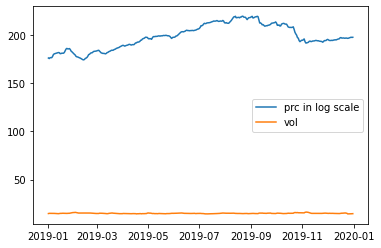

In [70]:
import numpy as np


MD_prc  =mc_donalds_info['prc'].rolling(5, min_periods = 1).mean()
MD_vol =  np.log(mc_donalds_info['vol'].rolling(5, min_periods = 1).mean())

index  = MD_prc.index

import matplotlib.pyplot as plt

plt.plot(index , MD_prc ,label = 'prc in log scale')
plt.plot(index , MD_vol, label = 'vol' )
plt.legend()

In [75]:
def rolling(company, days):
    restric = all_companies[ (all_companies['COMPANY NAME_x'] == company) |(all_companies['COMPANY NAME_y'] == company)]
    id_f = np.array(restric['Firm Id'])
    co_info =additional_data[ additional_data['Firm Id'] == id_f]
    co_info = co_info.set_index('date').groupby(pd.Grouper(freq = 'D')).mean()
    CO_prc  =co_info['prc'].rolling(days, min_periods = days/2).mean()
    CO_vol =  np.log(co_info['vol'].rolling(days, min_periods = days/2).mean())

    index  = CO_prc.index
    
    plt.plot(index , MD_prc ,label = 'prc in log scale')
    plt.plot(index , MD_vol, label = 'vol' )
    plt.legend()
    plt.title(company)
  
     

    
    
                        
    
    

In [74]:
rolling('BARCLAYS PLC', 15)

KeyError: 1

### Exercise 1.5)

Use the monthly return data from January 1945 to December 2019 in the file $\texttt{portfolio_data.xlsx}$. These are simple (gross) returns on three size portfolios. Denote $R_{t+1}$ the gross return between $t$ and $t+1$ and let $r_{t+1}$ be the respective log return (i.e. $r_{t+1} = ln(R_{t+1})$). Consider the following regression:

$r_{t, t+K} = \alpha_K + \beta_K r_{t-K, t} + \epsilon_{t, t+K}$   (1)

where:

$r_{t, t+K} = \sum_{j=1}^K r_{t+j}$

$r_{t-K, t} = \sum_{j=1}^K r_{t-j+1}$ 

Run the regression (1) for each size portfolio and for each horizon $k=1,12,24,36,48,60$ months. Plot the respective slope coefficients versus the horizon.

### Exercise 1.6)

Conduct a Monte Carlo study of the properties of ordinary least squares estimators of $\beta$ and $\rho$ in the following system:

$\begin{align} 
r_{t+1} &= \alpha + \beta x_t + u_{t+1} \\
x_{t+1} &= \theta + \rho x_t + v_{t+1} \\
\end{align}$

where we assume $\rho^2 < 1$ and 

$\begin{pmatrix} u_{t+1}\\v_{t+1} \end{pmatrix} \sim N \begin{pmatrix} 0, \begin{pmatrix}\sigma_u^2 & \sigma_{uv} \\ \sigma_{uv} & \sigma_v^2 \end{pmatrix} \end{pmatrix} $

More specifically, assume that $\alpha = \theta = 0$, $\beta = 0.210$, $\rho = 0.972$, and that $\sigma_u^2 = 0.0030050$, $\sigma_v^2 = 0.0000108$ and $\sigma_{uv} = -0.0001621$

Simulate 840 monthly observations of the above model, conditioning on that the
initial value of $x_t$ is zero (i.e., $x_0$ = 0). Estimate $\beta$ and $\rho$ with OLS. Store the estimates. Repeat this 10000 times. Provide the mean, standard deviation, skewness, and kurtosis for the distributions of the estimators. Also provide graphical illustrations of the distributions. Briefly comment on the results.

### Exercise 1.7)
Conduct a bootstrap studies on artifical data. Use a large number of replications $M$ (e.g. $M$ = 50000).

Simulate 100 identical and independent normally distributed observations with a mean of zero and a standard deviation of one, i.e. $x_t \sim N(0,1)$. Use these simulated datasets as your "sample". Estimate the mean and its standard error. Set up an IID bootstrap study and report the mean, standard deviation, bias, and a 95 % confidence interval.

Note: Conceptually, in case of an iid bootstrap you should resample your sample $M$ times, where $M$ is large. In every re-sampling step, compute the required sample statistics. This allows you to get a distribution of estimators by randomly resampling your initial sample. 